<div class="alert alert-block alert-info">
    
These blue boxes contain instructions for you to follow, or stuff for you to do
<h2>How to access this Jupyter notebook</h2>

* <b>Step 1</b>: Open a web browser,  and go to [this page](https://jupyter.warwick.ac.uk/module/CH274), 
* <b>Step 2</b>: Enter your SCRTP username and password and press the "Start Server" button.<br>
* <b>Step 3</b>: Wait (it could take a few minutes) until the blue box says "Jupyter notebook server running!". At that point, click on the weblink below said message.<br>
* <b>Step 4</b>: Select the Jupyter Notebook you want to work on. <i>Remember to make a copy of the orginal notebook</i> (which is read-only). To do so, in the toolbar on top of the notebook, select File and then Make a Copy <br>
* <b>Step 5</b>: You're all set! <br>
* <b>Step 6</b>: <font color="red">When you are done, remember to click the "Stop Server" button in the launcher web browser tab.</font> Please do, it's really quite important. <br>
<b> Remember: </b> You can access your copy of the Notebook at any time from any device off and on campus by going through the same steps on e.g. your laptop - all the changes you have made will be saved and synced! <br>

<div/>

# CH274: Python Skills
## Functions, Code Design, and Linear Algebra

In this session, we are going to look at some advanced features of the Python programming language, such as:
* How to write functions
* Methods to design a program with reusable code structures (aka functions)
* How to perform linear algebra operations with the numpy and scipy libraries
* How to not reinvent the wheel (using existing functions and libraries)

We will do this by writing a code that will solve a quantum mechanical problem: the particle in a box.
Our focus will be on the code!

## Quick Recap from CH160 and CH273


* you've learned about the basics of Python, variables, strings, printing




In [4]:
#real variables / floats
a = 1.0 + 2.0
#integer variables
b = 1 + 2
#strings/text
c = '1' + '2'
#complex numbers
d = 1.0 + 2.0j # this is a complex number with a real part (1.0) and an imaginary part (2.0j)

#Python automatically figures out variable types where possible

#formatted printing onto screen; each variable gets 15 spaces and is centred in that space
print("{:^15} | {:^15} | {:^15} | {:^15}".format("float", "integer", "string", "complex number"))
print("{:^15} | {:^15} | {:^15} | {:^15}".format(a, b, c, d))

     float      |     integer     |     string      | complex number 
      3.0       |        3        |       12        |     (1+2j)     


* You know that you can do basic algebra

In [5]:
#multiplying and dividing two variables
a = 10.0
b = 5.0
c = a * b
d = a / b
#taking powers of variables
e = a**2
f = a**b
print("{:^15} | {:^15} | {:^15} | {:^15}".format("a * b", "a / b", "a^2", "a^b"))
print("{:^15} | {:^15} | {:^15} | {:^15}".format(c, d, e, f))

     a * b      |      a / b      |       a^2       |       a^b      
     50.0       |       2.0       |      100.0      |    100000.0    


* you've learned how to use numpy to define arrays and lists of numbers and to read in files



In [6]:
import numpy as np #import numpy and use it with a shortcut 'np'
x = np.array([1,2,3,4,5,6,7,8,9,10])
print('This is an array',x)
y = x*x # multiplies each value in x with itself and generates a new array
print('arrays enable element-wise multiplications')
print('x                                 x*x')
print(x, y)

 # read in x-y data from a file
data = np.loadtxt('STUFF/test.txt')
print(data) #2-dimensional array with 10 rows and 2 columns 
print('Rows and Columns: ', data.shape)
print('Carving out 1st and 2nd column:')
print(data[:,0],data[:,1])
print('Carving out 1st and 2nd row')
print(data[0,:],data[1,:])

This is an array [ 1  2  3  4  5  6  7  8  9 10]
arrays enable element-wise multiplications
x                                 x*x
[ 1  2  3  4  5  6  7  8  9 10] [  1   4   9  16  25  36  49  64  81 100]
[[  1.   1.]
 [  2.   4.]
 [  3.   9.]
 [  4.  16.]
 [  5.  25.]
 [  6.  36.]
 [  7.  49.]
 [  8.  64.]
 [  9.  81.]
 [ 10. 100.]]
Rows and Columns:  (10, 2)
Carving out 1st and 2nd column:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] [  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]
Carving out 1st and 2nd row
[1. 1.] [2. 4.]


* you've learned how to iterate through arrays and lists with for-loops

In [7]:
#define x again here and rename it
index = 0
y = np.zeros(len(x)) #define an array of the same length as x filled with zeros
for x_val in x: #a loop iterating over every element in the array x, we access the element through x_val
    y[index] = x_val*x_val
    index = index + 1
print(y)
print('')
#there is a convenient function if you don't want to define index to label the position in the array
for index, x_val in enumerate(x):
    y[index] = x_val*x_val
print(y)

[  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]

[  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]


* you've learned how to do basic plotting

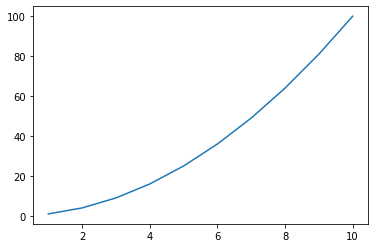

In [8]:
#commands with % sign are special jupyter notebook commands
%matplotlib notebook 
%matplotlib inline 
#lets import the main plotting engine from matplotlib
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.show()

***

# The particle in a box in 1D (pib1d)
Here's a quick reminder of the particle in a box 


<div class="col-md-12">
                    </div>
                    <div class="col-md-12">    
                    <div class="col-md-4">
                        <img src="STUFF/tik1d.png" alt="Motivation">
                    </div>    
                    <div class="col-md-8">
                        <p>  Schrödinger equation (SE): $\hat{H}\psi = E\psi $</p>
                        <p class="">  
                        SE: action of energy operator $\hat{H}$ defines the energy and wave function $\psi$  </p>
                        <p class=""> $$ \hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} +V  $$</p>
                        <p class=" margin-top-10"> boundary conditions: $ \psi(0) = 0 \quad\text{and}\quad \psi(L) = 0 $</p>
                    </div>
                    </div>                    
                    <div class="col-md-6">                   
                        <p><b>wave function</b></p>
                        <p> $$ \psi_n(x) = \sqrt{\frac{2}{L}}\sin{\frac{n\pi x}{L}}  $$ </p>
                    </div>
                    <div class="col-md-6">                    
                        <p><b>energies</b></p>
                        <p> $$ E_n = \frac{\hbar^2\pi^2}{2m}\frac{n^2}{L^2}  $$ </p>
                    </div>

Our approach to **design a code** to calculate the wave functions and the energies shall be as follows:

(1) First we have to think carefully about what different building blocks we need. Each of these elements or building blocks could potentially be designed to be an independent piece of code that can be called as often as we want (This is what we call a **function**.) Functions allow us to package and reuse code without having to modify it. Look at the cells in the Recap section to see examples of non-reusable code (sometimes called 'spagetti' code). With a function, I can package 100s of lines of code into a single command.

In the example of the pib1d, we need following building blocks

1.1 a function that sets up the box along the $x$ axis (let's call this function ```make_xgrid```)

1.2 a function that defines the potential and imposes the boundary condition (let's call this function ```potential```). This function defines the physical system. In the future we might be interested to swap the box for a harmonic potential or a different box.

1.3 a function that sets up the Hamiltonian (let's call this ```create_H```). This is universal and not problem-specific.

1.4 a function that diagonalises the SE: $\hat{H}\psi = E\psi $ to give us $E$ and $\psi$ (```diagonalise_H```)

1.5 a function that plots $E(x)$ and $\psi(x)$ (```generate_plots```)



(2) Then we need to write and test these 5 functions. **Testing** is essential as it enables us to know which parts of the code operate as intended. Tests that assess the validity of individual functions are called **unit tests**.

(3) At the end, when we know that all functions do what they are supposed to do, we write code (can be spagetti code or a function) that executes the functions in the right order. This is typically called the ```main``` or ```program```.



## 1.1 How do Python functions work?

A function has a definition followed by parentheses, which contain the function arguments. Functions typically also have a return value. See following example:

In [9]:
#Let's import some important packages before we start.
import numpy
#it's nice to abbreviate packages which we use a lot, so
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp  #scipy is now called sp

Now we define a function to make the x-axis grid. Take a look at all the common features of functions. Functions always look like this:

In [10]:
#A function starts with a `def` statement followed by the name of the function 
#and parenthesis which contain all the input variables
def make_xgrid(start, stop, N):
    #note the indentation, everything inside a function has to be indented
    """
    This is the help description of the function. 
    It serves to explain what the function does and what its arguments should be and its return value.
    Help descriptions always have three double quotes around them and are at the top of the function.
    
    This function has three input variables (also called arguments):
    
    'start' is a real number which specifies the left boundary of the x axis grid
    'stop' is a real number which specifies the right boundary of the x axis grid
    'N' is an integer number which specifies the number of grid points we need for our x axis between 0 and L
    
    The return value of the function is a numpy array, which contains the x axis values.
    
    """    
    
    #The numpy function linspace allows us to generate a numpy array which contains N values from 'start' to 'stop'
    #This array constitutes our x axis
    x = np.linspace(start,stop,N)
    
    #every function ends with a return statement. The function takes input variables or arguments and delivers a returnstatement.
    #return statements can be empty, the can be 'return True/False' or they can be variables, which have been calculated.
    #In our case, we return the created x-axis grid

    return x
#The return statement ends the function and the indentation returns to the level before the function

<div class="alert alert-block alert-info">

**Task 1** 

The help string can be accessed by placing a question mark after the function e.g. ```make_xgrid?```. **Give it a try!**

<br>

**Task 2** 

Let's call the function by issuing ```x = make_xgrid(start, stop, N)```. We want the box to go from 0 to 5, so the grid should have some space to the left and right. Generate an x grid from -1 to 6 with N=200 grid points and print it to screen.
</div>

In [11]:
#TASK 1 <insert code here>


See how your help string appears?
Functions in packages such as numpy, scipy and matplotlib have helpstrings. Try out plt.plot? and np.linalg.inv?

In [12]:
#TASK 2 
#<insert code here>

#When we call functions, we call the function name and assign input values. 
#The function will create something, which we need to pass into a variable

## 1.2 The potential function

Let's work on the ```potential``` function next! This function needs to calculate the values of the potential well along the x axis grid. This is simply 0 between 0 and L and a very large number (numerically 'close to infinity') outside of the box.

In [13]:
def potential(x, box_l=0.0, box_r=5.0, height=100000.0): 
    #Note how the 1st input has no value assigned, but the 2nd, 3rd and 4th do, e.g. box_l=0.0
    #When inputs have values assigned, they become optional with default values if you don't set them when you call the function
    """
    This function calculates the potential numpy array for a given numpy array of x axis values
    
    argument:
    x np.array : x axis grid
    box_l float :  left boundary value of the box
    box_r float :  right boundary value of the box
    
    return value:
    pot np.array
    """
    
    #the concept of infinity doesn't exist in computers, 
    #so we will assign the value 'height' to any point outside the range [box_l,box_r]
    
    #first, let's generate a potential array which has the same dimension as x, but zeros instead
    pot = np.zeros_like(x)     #isn't numpy great? This generates an array with zeros, which has the same shape like x
    
    for i, xvalue in enumerate(x): #we loop through all x values
        #enumerate is really nice. 
        #It allows us to loop through an array and, for each value, gives us an index i and the actual xvalue
        if (xvalue<box_l): #left wall
            pot[i] = height
        elif (xvalue> box_l and xvalue < box_r): #inside the box
            pot[i] = 0.0
        elif (xvalue>box_r): #right wall
            pot[i] = height
        else:
            #This part of the if-else structure is a fail-safe.
            #ALl possible values are covered by the if/elif clauses, so this one should never be reached. 
            #If it is reached, we want the code to throw the Python version of a hissy fit - a ValueError.
            #This would lead to a controlled end of the code with this error message on display.
            raise ValueError("COMPUTER SAYS NO. This point should never be reached.")
    
    #as usual, we need to return the result
    return pot
    


    
Note that in  ```potential```, the box_l and box_r arguments have values assigned to them. This is called a **default value** and makes the two values **optional arguments**. If we issue the function ```potential``` without box_l or box_r, it will still work, but it will assume their values are 0 and 5, respectively.

<br>
<div class="alert alert-block alert-info">
    
**Task 3** 

Test the potential function by calling it with the above defined x array once with and once without the box_l and box_r values of 0 and 5 assigned to it. Confirm that the results are identical by plotting pot vs. x!

</div>


In [14]:
#TASK 3 
#<insert code here>

#pot = potential(...)


## 1.3 Computational Linear Algebra: Scipy and Numpy are your friends


Alright, the next thing on our list requires some heavier maths, namely the functions ```create_H``` and ```diagonalise_H```.
We will again focus on the code, not the maths!

The function ```create_H``` is supposed to create the Hamiltonian of the pib1d:
\begin{equation}
\hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} +V
\end{equation}

We need to create the Hamiltonian in the basis representation that we have chosen, which is the discrete x axis grid. In this representation, the Hamiltonian is an N-by-N matrix, where N is the number of grid points.

We can calculate the potential with our ```potential``` function, but we are missing the kinetic energy contribution. Therefore, we need to calculate a numerical second derivative $d^2/dx^2$ (Laplace operator) with respect to $x$. This is where the numpy matrix routines and the ready-to-use scipy algebra operations will come in very handy.



There are some Python packages, which are absolutely essential to scientific computing. These include numpy, scipy, and matplotlib:
<div class="col-md-12">
<div class="col-md-4">
<a href="https://docs.scipy.org/doc/numpy/user/quickstart.html"> <img src="STUFF/Numpy.png"> </a>
</div>
<div class="col-md-4">
<a href="https://docs.scipy.org/doc/scipy/reference/"> <img src="STUFF/scipy.png"> </a>
</div>
<div class="col-md-4">
<a href="https://matplotlib.org/tutorials/index.html"> <img src="STUFF/matplotlib.png"></a>
</div></div>
Click on the images to explore some of their capabilities!

These packages have been designed, so that we do not have to **re-invent the wheel** every time we code something. ```numpy``` enables us to perform complex matrix and vector operations. ```scipy``` allows us to do integration, differentiation, interpolation, linear algebra, you name it! 

<br>

```scipy``` for example, has a function that allows us to construct  a numerical Laplace operator, called <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.laplace.html"> ```scipy.ndimage.laplace```</a>. We can use this to build the kinetic energy operator. (**Rule No. 1 of coding: Always try to see if somebody else has solved the problem already!**





In [15]:
def create_H(x, pot):
    """
    This function creates a Hamiltonian.
    It takes the x axis grid and the potential grid and returns the Hamiltonian matrix H=T+V
    """
    
    #We perform our calculations in atomic units, so hbar=1 and our particle has the mass 1
    hbar = 1
    m = 1
    #distance between grid points
    dx = x[1]-x[0]
    
    ###kinetic energy T
    import scipy.ndimage
    #This is the second derivative
    L = scipy.ndimage.laplace(np.eye(len(x)), mode='wrap')/(2.0*dx*dx) #np.eye is a diagonal unit matrix (I) with size 'x' by 'x'
    #Here we add all the constants
    T= -(1./2.)*((hbar**2)/m)*L
    
    #We build the hamiltonian by adding the potential energy to the matrix diagonal
    V = np.diag(pot)   #np.diag takes a list of numbers and puts it onto the diagonal; the offdiagonals are 0
    
    H = T+V
    return H
    

<div class="alert alert-block alert-info">
    
**Task 4** 

Test the create_H function by calling it with the x grid and the potential we have defined earlier. Use the plotting routine below to visualize the magnitude of the matrix elements. What is the structure of the matrix? Does it remind you of something you've seen in the lecture?

</div>


In [16]:
#TASK 4
H = create_H(x, pot)

plt.imshow(H[:20,:20],vmin=-50, vmax=100);
plt.xlabel('grid points')
plt.ylabel('grid points')
plt.colorbar()
plt.show()

NameError: name 'pot' is not defined

## 1.4 Calculating E and $\psi$
Now that we have the Hamiltonian, we 'just' need to diagonalise it. Here, again, scipy is of great help. It provides us with the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eigh.html">```scipy.linalg.eigh```</a> function, which calculates the eigenvalues ($E$) and eigenvectors ($\psi$) of a symmetric matrix (H).

In [ ]:
def diagonalise_H(H):
    """
    A 'wrapper function' for the eigh function. 
    We call functions 'wrappers' when they do little more but encapsulating an existing function.
    
    The function returns the eigenvalues and the matrix of wave function coefficients.
    
    """
    import scipy.linalg as la
    E, psi = la.eigh(H)
    return E, psi

<div class="alert alert-block alert-info">
    
**Task 5** 

Test the diagonalise_H function by calling it with the H matrix we built before. 
Print the eigenvalues and try to see if they make sense, when compared to:
    $$ E_n = \frac{\hbar^2\pi^2}{2m}\frac{n^2}{L^2} $$
</div>


In [ ]:
#TASK 5
E, psi = diagonalise_H(H)

#Use these functions to plot the energy levels of the particle in a box
plt.plot(np.ones(len(E)),E,lw=0.0, marker='_',ms=40)
plt.ylim(0,10)
plt.ylabel('Energy in Hartree')

Looks like we just solved the quantum mechanical particle in a box problem. Now we need a fancy visualisation function!

## 1.5 We need a plotting function

The following function is quite complicated and you don't need to understand it in detail for now. **We will simply use it**. 
You'll learn more about plotting in the fourth key skills lecture


In [ ]:
####PLEASE IGNORE THIS BOX, JUST EXECUTE IT
#### %matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
    
def plot_pib1d(x, pot, E, psi, n=0):
        """
        plots the energies, the wave function and the probability density with interactive handles.
        """

        n=n-1
        import matplotlib.gridspec as gridspec
        plt.figure(figsize=(11, 8), dpi= 80, facecolor='w', edgecolor='k') # figsize determines the actual size of the figure
        gs1 = gridspec.GridSpec(2, 3)
        gs1.update(left=0.05, right=0.90, wspace=0.35,hspace=0.25)
        ax1 = plt.subplot(gs1[: ,0])
        ax2 = plt.subplot(gs1[0, 1:])
        ax3 = plt.subplot(gs1[1, 1:])


        ax1.plot(x, pot, color='gray')
        ax1.plot(np.ones(len(E)), E, lw=0.0, marker='_',ms=4000, color='blue')
        ax1.plot(1, E[n], lw=0.0, marker='_',ms=4000, color='red')
        ax1.set_ylim(-1,21)
        ax2.plot(x, psi[:,n])  
        ax3.plot(x, psi[:,n]*psi[:,n])

        #figure out boundaries
        start=0; stop=0
        for i, p in enumerate(pot):
            if (p>-0.001 and p<0.001):
                start=x[i-1]
                break
        for i, p in enumerate(pot):
            if (p>-0.001 and p<0.001):
                stop=x[i+1]

        ax2.axvline(start, color='gray')
        ax2.axvline(stop, color='gray')  
        ax3.axvline(start, color='gray')
        ax3.axvline(stop, color='gray')
        ax3.axhline(0.0,color='gray')

        #Labeling of x and y axes
        ax1.set_xlabel('x',fontsize=14)
        ax1.set_ylabel('Energy [eV]',fontsize=14)
        ax2.set_ylabel(r'wave function $\psi(x)$',fontsize=14)
        ax3.set_ylabel(r'density $|\psi|^2$(x)',fontsize=14)
        ax2.set_xlabel(r'x',fontsize=14)
        ax3.set_xlabel(r'x',fontsize=14)

        #Show the final result
        plt.show()
        return plot_pib1d


<div class="alert alert-block alert-info">
    
**Task 6** 

Play around with the visualisation! Verify that your functions produce the right physics. You should look out for the following features:
<br>
(A) Do the wave functions show the right number of nodal planes?
<br>
(B) Do the energy levels follow the $n^2$ behavior?
</div>

In [ ]:
#TASK 6 EXECUTE THIS CELL

#This function generates an interactive plot of the box, the energies, the wavefunctions
interactive_plot = interactive(plot_pib1d,x=fixed(x),pot=fixed(pot),E=fixed(E),psi=fixed(psi),n=range(1,21))

interactive_plot

## Putting it all together - the `main program`

Now we have all the ingredients we need to build a stand-alone program that performs these operations. We simply generate a ```pib1d``` function which takes arguments and then executes the functions we have generated above in the right order. Some of the sub-function arguments depend on each other and don't need to be set by the user, for example if the box goes from 0 to 5, we can just force the x axis grid to always extend by 1 to the left and to the right. (This is what we call **user interface design**. We don't bother users with too many choices if there are sensible defaults.)


In [ ]:
def pib1d(N, box_l, box_r, height=100000.0):
    """
    calculates and visualises the energies and wave functions of the 1d particle in a box
    
    This program takes the number of grid points and the start and end point of the box as arguments and 
    returns a visualisation.
    """
    
    #make an x axis
    x = make_xgrid(box_l-1.0,box_r+1.0,N)
    #create a box potential on that axis
    pot = potential(x,box_l, box_r, height)
    #calculate Hamiltonian
    H = create_H(x,pot)
    #diagonalise Hamiltonian, solve for E and psi
    E, psi = diagonalise_H(H)
    #plot results
    interact(plot_pib1d,x=fixed(x),pot=fixed(pot),E=fixed(E),psi=fixed(psi),n=range(1,21))   
    
    #If the function doesn't have a return value and simply executes a number of commands, 
    #we simply return the logical value true when everything ran smoothly to the end
    return True

In [ ]:
#Let's give this program (function of functions) a test run

#Number of grid points
N = 2000
box_l = 0.0
box_r = 3.0
height = 10000.0
pib1d(N,box_l,box_r, height)
#note how there is no x= pib1d. We don't HAVE to assign the output value of a function to a variable
#runstate =pib1d(N,box_l,box_r, height) also works


## Let's play with it!

<div class="alert alert-block alert-info">
    
**Tasks 7**  
* What happens to the energies when you change the box size?
* What happens when we reduce the height of the box to 10.0? Look at the density at the box edges! (The wave function is tunneling)
<div/>

In [ ]:
#TASK
N =  #<INSERT VALUE>
box_l =   #<INSERT VALUE>
box_r =   #<INSERT VALUE>
height =  #<INSERT VALUE>
pib1d(N,box_l,box_r, height)

## The power of reusable code - beyond the particle in a box

Because we wrote our code in such a general and reusable way, we can use it for other problems beyond the particle in a box. For example, we can simply switch the potential function to something else and describe that. Below, I supply a potential function for a harmonic potential and I changed a single line in the main code (```HO1D```) to calculate the **quantum mechanical harmonic oscillator**

In [ ]:
#potential function
def harmonic_potential(x, x0=2.5, k=10.):
    """
    Function calculates harmonic potential on x-axis centred around x0 with spring constant k
    """
    return 0.5*k*(x-x0)*(x-x0)


#new main program where we replaced the potential
def HO1D(N,box_l,box_r, k=10.0):
        
    x = make_xgrid(box_l-1.0,box_r+1.0,N)
    ######ONLY THE FOLLOWING LINES ARE DIFFERENT
    x0 = (box_l+box_r)/2  #define the centre of the harmonic oscillator in the middle of the box
    pot = harmonic_potential(x, x0, k)
    ######END OF DIFFERENCE##########
    H = create_H(x,pot)
    E, psi = diagonalise_H(H)
    interact(plot_pib1d,x=fixed(x),pot=fixed(pot),E=fixed(E),psi=fixed(psi),n=range(1,21))   
    
    return True

In [ ]:
#Number of grid points
N = 200
box_l = 0.0
box_r = 5.0
height = 10.0
HO1D(N,box_l,box_r, height)

<div class="alert alert-block alert-info">
    
## Tasks
* You can design your own potential functions to play around with this. For example, a box with a kink in the middle, or the Coulomb potential for a hydrogen atom in 1D.<br>
<div/>